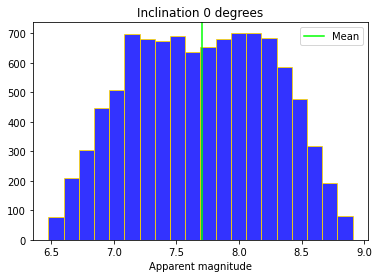

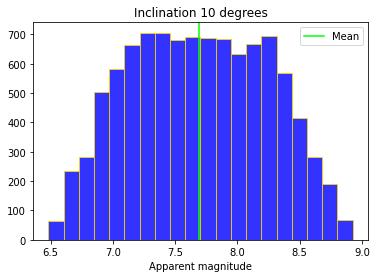

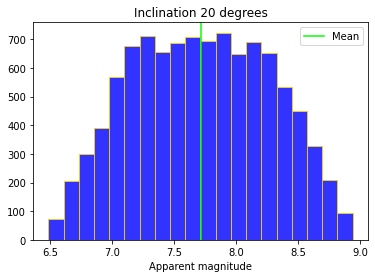

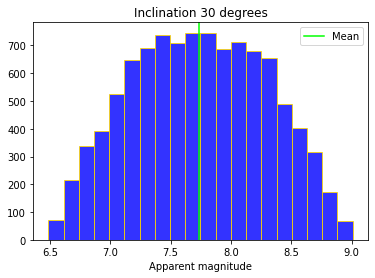

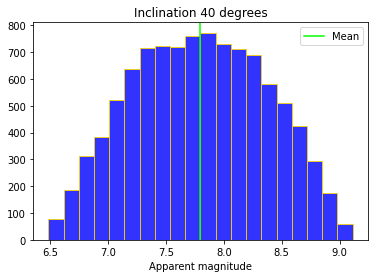

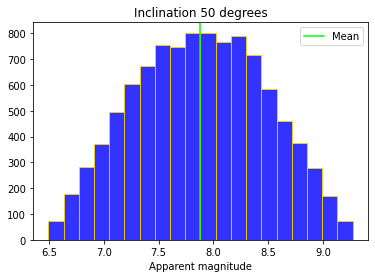

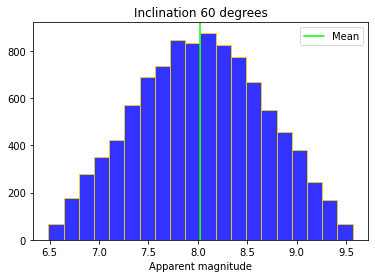

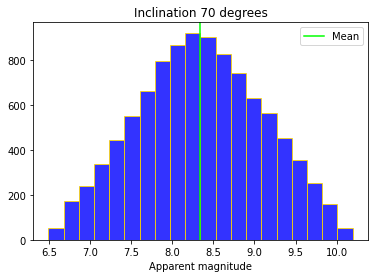

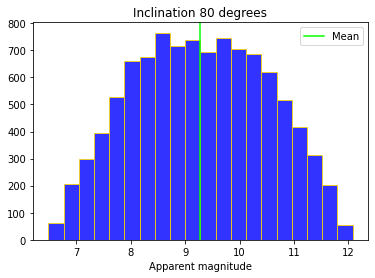

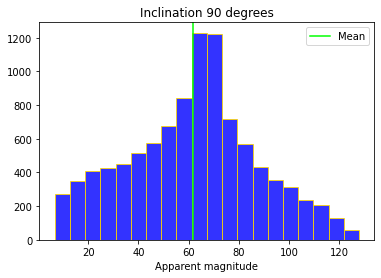

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics as st

# Setting up galaxy parameters

distances = [1*10**6, 15*10**6, 30*10**6, 100*10**6, 1000*10**6]
distance = distances[0]
L=3*10^45
L_0=3.10128*10**28
radius=30000
thickness=335/2
alpha=2*10**(-3)
extinction_list=[]

def magnitude(L,a):
    #magnitude= -2.5*np.log10(L/L_0)+a
    #return magnitude
    magnitude = 5*np.log10(distance/10) + a + random.uniform(-18.53, -16.75) # transforming the absolute magnitude into apparent magnitude
    return magnitude

def extinction(r,phi,z,incl):
    l_h=100000000
    l_r=100000000
    if inclination!=90:
        l_h=(thickness-z)/np.sin(np.deg2rad(90-incl))
    if inclination!=0:
        l_r=((np.sqrt(radius**2 - r**2*np.sin(phi)**2))-r*np.cos(phi))/np.cos(np.deg2rad(90-incl))
    #print('inclination',incl,'extinction',min(l_h*alpha,l_r*alpha),'distance',min(l_h,l_r))
    return min(l_h*alpha,l_r*alpha)

#Luminosity of the supernova L

SN_mag=[-17.45,-17.66,-16.99,-17.98,-16.75,-18.53]
average_extinctions = []
#1b,1c,IIb,IIL,IIP,IIn
# from D.Richardson et al. (2014)

for inclination in [0,10,20,30,40,50,60,70,80,90]:
    list_mag = []
    random_mags = []
    extinctions = []
    for i in range(10000):
        r = random.uniform(0,radius)
        z = random.uniform(-thickness,thickness)
        random_mag = 5*np.log10(distance/10) + random.uniform(-18.53, -16.75)
        phi = random.uniform(0,2*np.pi)
        a=extinction(r,phi,z,inclination)
        mag=magnitude(L,a)
        list_mag.append(mag) # extinction corrected magnitudes
        random_mags.append(random_mag) # random magnitudes around the average values
        extinctions.append(a)
    average_extinctions.append(st.mean(extinctions))
    plt.figure()
    plt.hist(list_mag, bins=20, alpha = 0.8, color = 'blue', lw = 1, ec = 'gold')
    #plt.hist(random_mags, bins=np.arange(min(random_mags), max(random_mags), 0.2), alpha = 0.8, color = 'red', lw = 1, ec = 'lime')
    plt.axvline(st.mean(list_mag), color = 'lime', label = 'Mean')
    #plt.axvline(st.median(random_mags), color = 'lime')
    plt.title('Inclination ' + str(inclination) + ' degrees')
    plt.xlabel('Apparent magnitude')
    plt.legend()
    plt.show()
#print(list_mag)
#print(extinction_list)

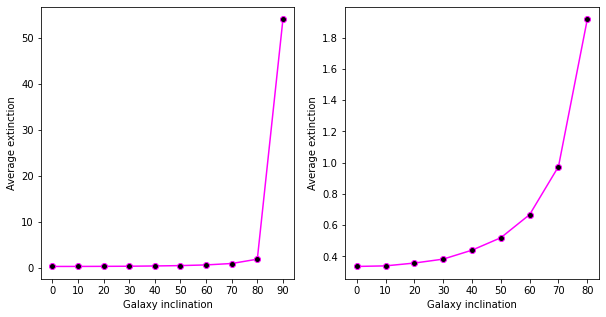

In [43]:
fig, ax = plt.subplots(1,2)
ax[0].plot([0,10,20,30,40,50,60,70,80,90], average_extinctions, color = 'magenta', marker = 'o', markerfacecolor = 'black')
ax[0].set_xticks([0,10,20,30,40,50,60,70,80,90])
ax[0].set_xlabel('Galaxy inclination')
ax[0].set_ylabel('Average extinction')

ax[1].plot([0,10,20,30,40,50,60,70,80], average_extinctions[:9], color = 'magenta', marker = 'o', markerfacecolor = 'black')
ax[1].set_xticks([0,10,20,30,40,50,60,70,80])
ax[1].set_xlabel('Galaxy inclination')
ax[1].set_ylabel('Average extinction')

fig = plt.gcf()
fig.set_size_inches(10,5)
#plt.savefig('Average extinctions')

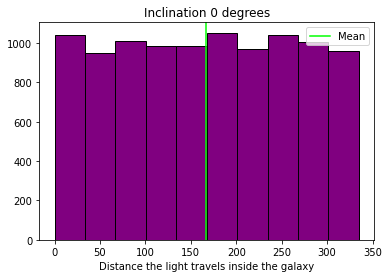

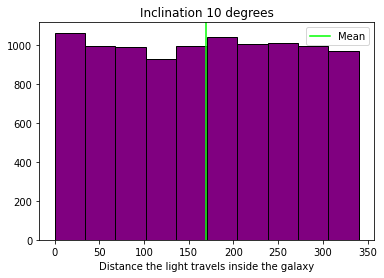

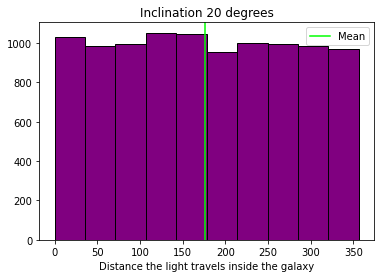

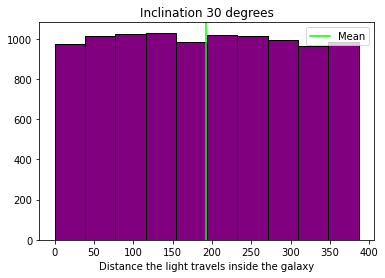

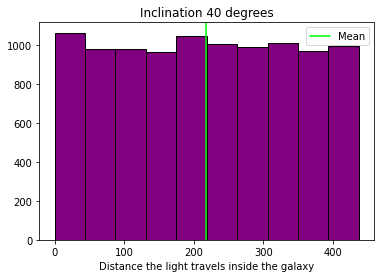

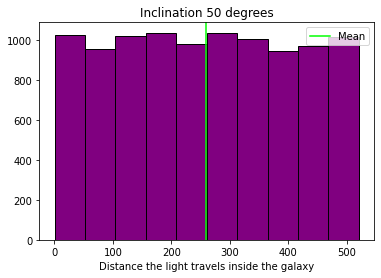

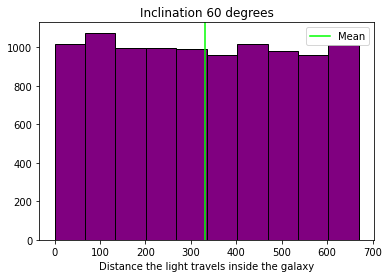

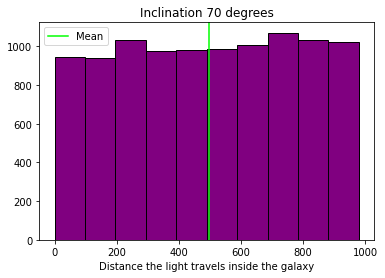

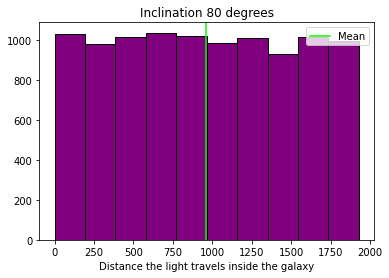

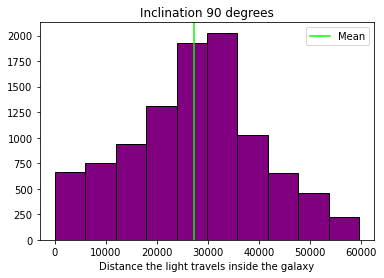

In [4]:

distances = [1*10**6, 15*10**6, 30*10**6, 100*10**6, 1000*10**6]
distance = distances[4]
L=3*10^45
L_0=3.10128*10**28
radius=30000
thickness=335/2
alpha=2*10**(-3)
extinction_list=[]

def magnitude(L,a):
    #magnitude= -2.5*np.log10(L/L_0)+a
    #return magnitude
    magnitude = 5*np.log10(distance/10) + a + random.uniform(-18.53, -16.75) # transforming the absolute magnitude into apparent magnitude
    return magnitude

def extinction(r,phi,z,incl):
    l_h=100000000
    l_r=100000000
    if inclination!=90:
        l_h=(thickness-z)/np.sin(np.deg2rad(90-incl))
    if inclination!=0:
        l_r=((np.sqrt(radius**2 - r**2*np.sin(phi)**2))-r*np.cos(phi))/np.cos(np.deg2rad(90-incl))
    #print('inclination',incl,'extinction',min(l_h*alpha,l_r*alpha),'distance',min(l_h,l_r))
    return(min(l_h*alpha,l_r*alpha), min(l_h,l_r))

#Luminosity of the supernova L

list_mag = []
random_mags = []
SN_mag=[-17.45,-17.66,-16.99,-17.98,-16.75,-18.53]
extinctions = []
average_extinctions = []
light_distances = []
#1b,1c,IIb,IIL,IIP,IIn
# from D.Richardson et al. (2014)

for inclination in [0,10,20,30,40,50,60,70,80,90]:
    light_distances = []
    for i in range(10000):
        r = random.uniform(0,radius)
        z = random.uniform(-thickness,thickness)
        random_mag = 5*np.log10(distance/10) + random.uniform(-18.53, -16.75)
        phi = random.uniform(0,2*np.pi)
        a,b=extinction(r,phi,z,inclination)
        mag=magnitude(L,a)
        list_mag.append(mag) # extinction corrected magnitudes
        random_mags.append(random_mag) # random magnitudes around the average values
        extinctions.append(a)
        light_distances.append(b)
    average_extinctions.append(st.mean(extinctions))
    plt.figure()
    plt.hist(light_distances, color = 'purple', lw = 1, ec = 'black')
    plt.axvline(st.mean(light_distances), color = 'lime', label = 'Mean')
    plt.title('Inclination ' + str(inclination) + ' degrees')
    plt.xlabel('Distance the light travels inside the galaxy')
    plt.legend()
    plt.show()
#print(list_mag)
#print(extinction_list)

# Average apparent magnitude as a function of distance in all inclinations

In [30]:
average_apparent_mags = []
distancess = [1*10**6, 10*10**6, 20*10**6, 30*10**6, 40*10**6, 50*10**6, 60*10**6, 70*10**6, 80*10**6, 90*10**6, 100*10**6]
for distance in distancess:
    L=3*10^45
    L_0=3.10128*10**28
    radius=30000
    thickness=335/2
    alpha=2*10**(-3)
    def magnitude(L,a):
        #magnitude= -2.5*np.log10(L/L_0)+a
        #return magnitude
        magnitude = 5*np.log10(distance/10) + a + random.uniform(-18.53, -16.75) # transforming the absolute magnitude into apparent magnitude
        return magnitude

    def extinction(r,phi,z,incl):
        l_h=100000000
        l_r=100000000
        if inclination!=90:
            l_h=(thickness-z)/np.sin(np.deg2rad(90-incl))
        if inclination!=0:
            l_r=((np.sqrt(radius**2 - r**2*np.sin(phi)**2))-r*np.cos(phi))/np.cos(np.deg2rad(90-incl))
        #print('inclination',incl,'extinction',min(l_h*alpha,l_r*alpha),'distance',min(l_h,l_r))
        return min(l_h*alpha,l_r*alpha)

    #Luminosity of the supernova L

    SN_mag=[-17.45,-17.66,-16.99,-17.98,-16.75,-18.53]
    average_extinctions = []
    new_a_mags = []
    #1b,1c,IIb,IIL,IIP,IIn
    # from D.Richardson et al. (2014)

    for inclination in [0,10,20,30,40,50,60,70,80,90]:
        list_mag = []
        random_mags = []
        extinctions = []
        for i in range(10000):
            r = random.uniform(0,radius)
            z = random.uniform(-thickness,thickness)
            random_mag = 5*np.log10(distance/10) + random.uniform(-18.53, -16.75)
            phi = random.uniform(0,2*np.pi)
            a=extinction(r,phi,z,inclination)
            mag=magnitude(L,a)
            list_mag.append(mag) # extinction corrected magnitudes
            random_mags.append(random_mag) # random magnitudes around the average values
            extinctions.append(a)
        average_extinctions.append(st.mean(extinctions))
        new_a_mags.append(st.mean(list_mag))
    average_apparent_mags.append(new_a_mags)

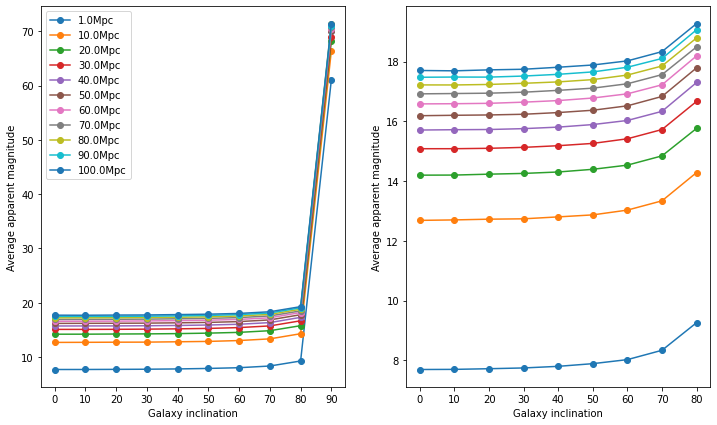

In [44]:
inclis = [0,10,20,30,40,50,60,70,80,90]
dis = np.array(distancess)/(10**6)
fig, ax = plt.subplots(1,2)
for i in range(len(average_apparent_mags)):
    ax[0].plot(inclis, average_apparent_mags[i] , marker = 'o', label = str(dis[i]) + 'Mpc')
ax[0].set_xticks([0,10,20,30,40,50,60,70,80,90])
ax[0].legend()
ax[0].set_xlabel('Galaxy inclination')
ax[0].set_ylabel('Average apparent magnitude')

for i in range(len(average_apparent_mags)):
    ax[1].plot(inclis[:9], average_apparent_mags[i][:9] , marker = 'o', label = str(dis[i]) + 'Mpc')
ax[1].set_xticks([0,10,20,30,40,50,60,70,80])
#ax[1].legend()
ax[1].set_xlabel('Galaxy inclination')
ax[1].set_ylabel('Average apparent magnitude')

fig = plt.gcf()
fig.set_size_inches(12,7)
#plt.savefig('Average apparent magnitudes')